In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from tensorflow.keras import datasets, layers, models


In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

NameError: name 'cifar10' is not defined

NameError: name 'datasets' is not defined

In [1]:
X_test.shape

NameError: name 'X_test' is not defined

In [4]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

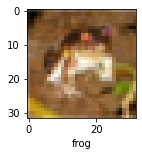

In [9]:
plot_sample(X_train, y_train, 0)

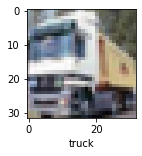

In [10]:
plot_sample(X_train, y_train, 1)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.8131 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6249 - accuracy: 0.4239
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5437 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4849 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4333 - accuracy: 0.4948


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.44      0.53      1000
           1       0.61      0.63      0.62      1000
           2       0.35      0.32      0.33      1000
           3       0.33      0.36      0.35      1000
           4       0.31      0.59      0.41      1000
           5       0.44      0.29      0.35      1000
           6       0.47      0.62      0.54      1000
           7       0.68      0.38      0.48      1000
           8       0.61      0.63      0.62      1000
           9       0.61      0.50      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6298 - accuracy: 0.7800
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6013 - accuracy: 0.7896
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.5725 - accuracy: 0.7989
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.5439 - accuracy: 0.8087
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5247 - accuracy: 0.8157
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4989 - accuracy: 0.8255
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4720 - accuracy: 0.8340
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4525 - accuracy: 0.8402
Epoch 9/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.4350 - accuracy: 0.8465
Epoch 10/10
1563/1563 [==============================] - 51s 32m

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9385 - accuracy: 0.6908


[0.9384669661521912, 0.6908000111579895]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[9.67789019e-05, 1.89215177e-06, 3.65605857e-03, 7.46650100e-01,
        8.16063221e-06, 2.38367006e-01, 5.76310931e-03, 9.69221583e-05,
        5.27731143e-03, 8.26917239e-05],
       [2.27476773e-03, 2.21922651e-01, 7.41729991e-07, 9.45813440e-07,
        9.26417720e-10, 4.77772559e-08, 1.32579308e-08, 9.86493887e-10,
        6.26893878e-01, 1.48907021e-01],
       [3.59640159e-02, 6.03370462e-03, 7.84486008e-04, 3.40361963e-03,
        5.48721291e-05, 7.06426043e-04, 1.96779656e-05, 2.54556013e-04,
        9.49553251e-01, 3.22537869e-03],
       [2.67976642e-01, 6.73000654e-03, 3.11832246e-03, 2.77252286e-03,
        6.32510782e-05, 1.04103150e-04, 2.49515870e-04, 1.81606993e-05,
        7.18846679e-01, 1.20857854e-04],
       [9.52098162e-07, 7.24603115e-06, 7.15510361e-03, 4.23776209e-02,
        3.57049331e-02, 3.17709357e-03, 9.11510885e-01, 2.99116527e-05,
        2.51469992e-05, 1.11929439e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

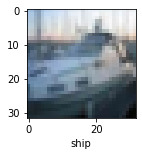

In [32]:
plot_sample(X_test, y_test,2)

In [31]:
classes[y_classes[2]]

'ship'

In [30]:
classes[y_classes[4]]

'frog'